# Introducción a Python scikit-learn con los pingüinos

En este ejercicio haremos uso de scikit para generar un estimador lineal que nos permita estimar de que especie es un pingüino en base a la medida de dos de sus dimensiones.



Para generar un modelo de aprendizaje de máquina, necesitamos varios pasos previos a procesar nuestra información.
Procedemos a cargar el dataset de pinguinos, posteriormente limpiamos los datos, separamos los datos en un grupo de prueba y uno de entrenamiento y finalmente generamos el modelo.




In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

In [6]:
# igual a
# p_df = sns.load_dataset("penguins")
p_df = pd.read_csv("penguins_size.csv")
p_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Existen 7 columnas

* species: specie
* island: la isla encontrada el pinguino
* culmen_length: longitud pico
* culmen width: ancho pico
* flipper lenght: aletas

In [8]:
p_df.describe(include="all")


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [9]:
print("La matriz de covarianza:")
p_df.cov()

La matriz de covarianza seria:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [10]:
print("La matriz de correlacion:")
p_df.corr()

La matriz de correlacion:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Limpiar nulos

*es muy importante en particular con estos metodos*



In [13]:
print(p_df.isnull().sum())
p_df.dropna(inplace=True)
## la forma sofisticada

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
#p_df=imputer.fit_transform(p_df)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [14]:
# ya sin nulos
print(p_df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


# Comenzamos con sklearn

Importamos de sklearn



In [15]:
!pip install sklearn
!pip install scikit-learn


In [17]:
import sklearn as sks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [18]:
lb = LabelEncoder()

In [19]:
p_df['sex'] = lb.fit_transform(p_df["sex"])
p_df['sex'].head()

0    2
1    1
2    1
4    1
5    2
Name: sex, dtype: int64

In [21]:
p_df['species'].value_counts()

AttributeError: 'Series' object has no attribute 'iplot'

<AxesSubplot:>

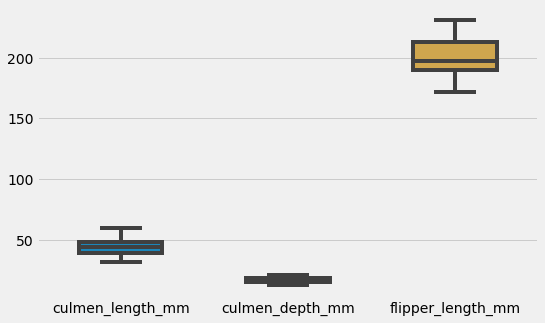

In [22]:
simple_df = p_df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=simple_df, width=0.5,fliersize=5)

/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


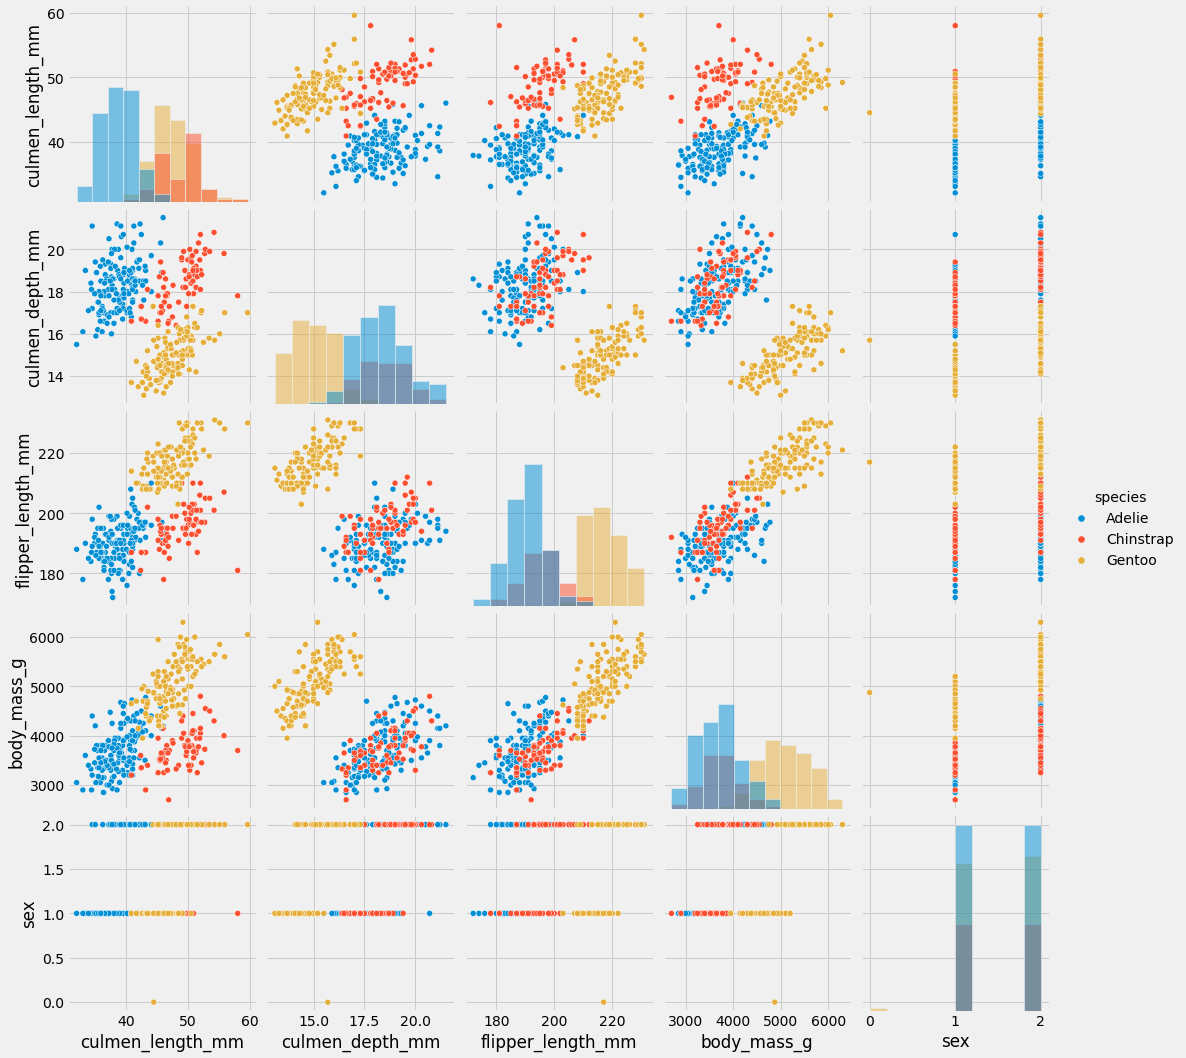

In [23]:
sns.pairplot(data=p_df, hue="species", size=3, diag_kind="hist")

## Longitud pico vs ancho pico


/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


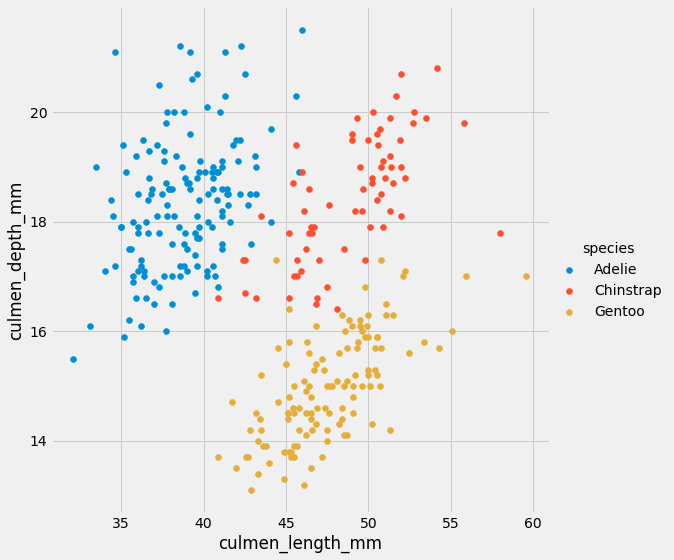

In [24]:
sns.FacetGrid(p_df, hue="species", size=8).map(plt.scatter, "culmen_length_mm", "culmen_depth_mm").add_legend()

## Longitud Pico vs Longitud Aleta

/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


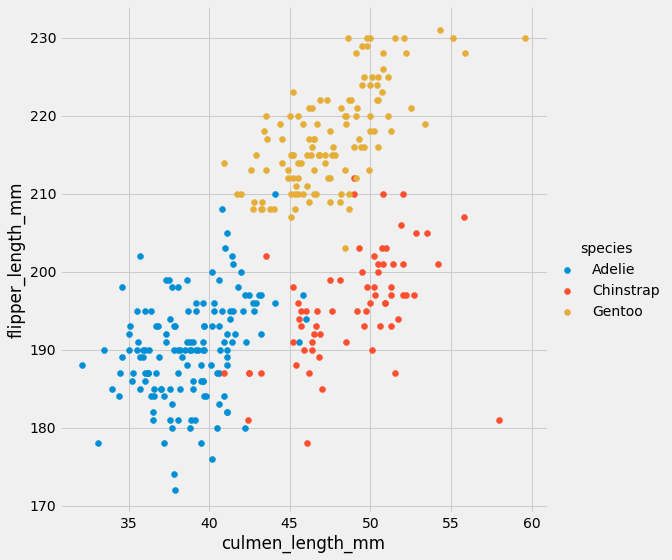

In [25]:
sns.FacetGrid(p_df, hue="species", size=8).map(plt.scatter, "culmen_length_mm", "flipper_length_mm").add_legend()

<AxesSubplot:>

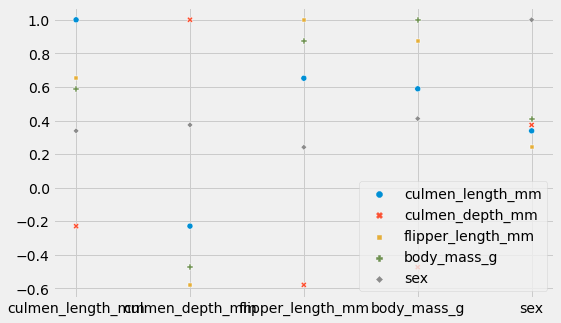

In [29]:
c_var = p_df.corr()
sns.scatterplot(data=c_var)

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
culmen_columns = ["culmen_length_mm", "culmen_depth_mm"]
target_column = 'species'

data, target = p_df[culmen_columns], p_df[target_column]

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=0
)

range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}

In [34]:
## Copiado de documentacion de scikit


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax



In [41]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(data_train, target_train)

LogisticRegression()

Ahora graficamos

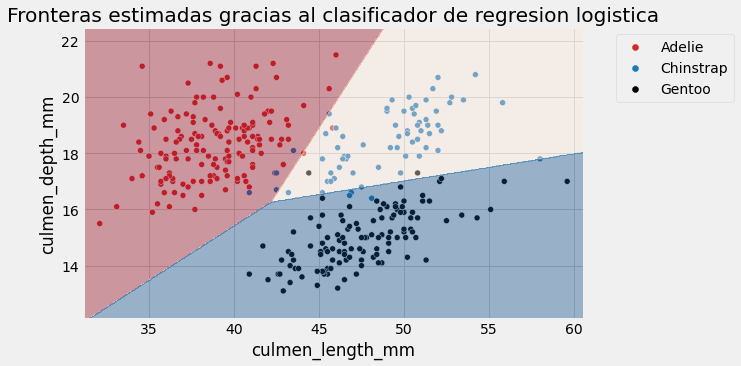

In [39]:
# create a palette to be used in the scatterplot
palette = ["tab:red", "tab:blue", "black"]

ax = sns.scatterplot(data=p_df, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(linear_model, range_features, ax=ax)
# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Fronteras estimadas gracias al clasificador de regresion logistica")

In [40]:
test_score = linear_model.score(data_test, target_test)
print(f"Exactitud de la regresion logistica en datos prueba: {test_score:.2f}")


Exactitud de la regresion logistica en datos prueba: 0.96


In [51]:
# pinguino chinstrap imaginario
chinstrap_imaginario = [[50,20]]
gentoo_imaginario = [[45,14]]


print(f"Para un pinguino imaginario {chinstrap_imaginario} el resultado es: ({linear_model.predict(chinstrap_imaginario)})")
print(f"Para un pinguino imaginario {gentoo_imaginario} el resultado es: ({linear_model.predict(gentoo_imaginario)})")

Para un pinguino imaginario [[50, 20]] el resultado es: (['Chinstrap'])
Para un pinguino imaginario [[45, 14]] el resultado es: (['Gentoo'])
[[6.10795526e-03 9.93557393e-01 3.34651388e-04]]


In [57]:
y_pred_proba = linear_model.predict_proba(chinstrap_imaginario)
